# 11 Kullback-Leibler情報量

黒木玄

2018-06-24～2019-04-03, 2023-06-22

* Copyright 2018,2023 Gen Kuroki
* License: MIT https://opensource.org/licenses/MIT
* Repository: https://github.com/genkuroki/Calculus

このファイルは次の場所できれいに閲覧できる:

* http://nbviewer.jupyter.org/github/genkuroki/Calculus/blob/master/11%20Kullback-Leibler%20information.ipynb

* https://genkuroki.github.io/documents/Calculus/11%20Kullback-Leibler%20information.pdf

このファイルは <a href="https://juliabox.com">Julia Box</a> で利用できる.

自分のパソコンに<a href="https://julialang.org/">Julia言語</a>をインストールしたい場合には

* [WindowsへのJulia言語のインストール](http://nbviewer.jupyter.org/gist/genkuroki/81de23edcae631a995e19a2ecf946a4f)

* [Julia v1.1.0 の Windows 8.1 へのインストール](https://nbviewer.jupyter.org/github/genkuroki/msfd28/blob/master/install.ipynb)

を参照せよ. 前者は古く, 後者の方が新しい.

論理的に完璧な説明をするつもりはない. 細部のいい加減な部分は自分で訂正・修正せよ.

$
\newcommand\eps{\varepsilon}
\newcommand\ds{\displaystyle}
\newcommand\Z{{\mathbb Z}}
\newcommand\R{{\mathbb R}}
\newcommand\C{{\mathbb C}}
\newcommand\QED{\text{□}}
\newcommand\root{\sqrt}
\newcommand\bra{\langle}
\newcommand\ket{\rangle}
\newcommand\d{\partial}
\newcommand\sech{\operatorname{sech}}
$

<h1>目次<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Kullback-Leibler情報量の基本性質" data-toc-modified-id="Kullback-Leibler情報量の基本性質-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Kullback-Leibler情報量の基本性質</a></span><ul class="toc-item"><li><span><a href="#KL情報量の定義" data-toc-modified-id="KL情報量の定義-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>KL情報量の定義</a></span></li><li><span><a href="#KL情報量の正値性" data-toc-modified-id="KL情報量の正値性-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>KL情報量の正値性</a></span></li><li><span><a href="#KL情報量の凸性" data-toc-modified-id="KL情報量の凸性-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>KL情報量の凸性</a></span></li><li><span><a href="#KL情報量が-$L^1$-ノルムの2乗を上から押さえること" data-toc-modified-id="KL情報量が-$L^1$-ノルムの2乗を上から押さえること-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>KL情報量が $L^1$ ノルムの2乗を上から押さえること</a></span></li><li><span><a href="#KL情報量の使われ方" data-toc-modified-id="KL情報量の使われ方-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>KL情報量の使われ方</a></span></li></ul></li><li><span><a href="#多項分布のSanovの定理" data-toc-modified-id="多項分布のSanovの定理-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>多項分布のSanovの定理</a></span><ul class="toc-item"><li><span><a href="#Sanovの定理とその証明" data-toc-modified-id="Sanovの定理とその証明-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Sanovの定理とその証明</a></span></li><li><span><a href="#Sanovの定理の使い方1" data-toc-modified-id="Sanovの定理の使い方1-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Sanovの定理の使い方1</a></span></li><li><span><a href="#二項分布の場合" data-toc-modified-id="二項分布の場合-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>二項分布の場合</a></span></li><li><span><a href="#Sanovの定理の使い方2" data-toc-modified-id="Sanovの定理の使い方2-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Sanovの定理の使い方2</a></span></li><li><span><a href="#連続的な確率分布の場合" data-toc-modified-id="連続的な確率分布の場合-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>連続的な確率分布の場合</a></span></li><li><span><a href="#正規分布による近似" data-toc-modified-id="正規分布による近似-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>正規分布による近似</a></span></li><li><span><a href="#多項分布の中心極限定理" data-toc-modified-id="多項分布の中心極限定理-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>多項分布の中心極限定理</a></span></li></ul></li></ul></div>

In [1]:
using Base.MathConstants
using Base64
using Printf
using Statistics
const e = ℯ
endof(a) = lastindex(a)
linspace(start, stop, length) = range(start, stop, length=length)

using Plots
#gr(); ENV["PLOTS_TEST"] = "true"
#clibrary(:colorcet)
#clibrary(:misc)
default(fmt=:png)

function pngplot(P...; kwargs...)
    sleep(0.1)
    pngfile = tempname() * ".png"
    savefig(plot(P...; kwargs...), pngfile)
    showimg("image/png", pngfile)
end
pngplot(; kwargs...) = pngplot(plot!(; kwargs...))

showimg(mime, fn) = open(fn) do f
    base64 = base64encode(f)
    display("text/html", """<img src="data:$mime;base64,$base64">""")
end

using SymPy
#sympy.init_printing(order="lex") # default
#sympy.init_printing(order="rev-lex")

using SpecialFunctions
using QuadGK

In [2]:
# Override the Base.show definition of SymPy.jl:
# https://github.com/JuliaPy/SymPy.jl/blob/29c5bfd1d10ac53014fa7fef468bc8deccadc2fc/src/types.jl#L87-L105

@eval SymPy function Base.show(io::IO, ::MIME"text/latex", x::SymbolicObject)
    print(io, as_markdown("\\displaystyle " * sympy.latex(x, mode="plain", fold_short_frac=false)))
end
@eval SymPy function Base.show(io::IO, ::MIME"text/latex", x::AbstractArray{Sym})
    function toeqnarray(x::Vector{Sym})
        a = join(["\\displaystyle " * sympy.latex(x[i]) for i in 1:length(x)], "\\\\")
        """\\left[ \\begin{array}{r}$a\\end{array} \\right]"""
    end
    function toeqnarray(x::AbstractArray{Sym,2})
        sz = size(x)
        a = join([join("\\displaystyle " .* map(sympy.latex, x[i,:]), "&") for i in 1:sz[1]], "\\\\")
        "\\left[ \\begin{array}{" * repeat("r",sz[2]) * "}" * a * "\\end{array}\\right]"
    end
    print(io, as_markdown(toeqnarray(x)))
end

## Kullback-Leibler情報量の基本性質

### KL情報量の定義

一般の確率分布についても定義可能だが, このノートでは簡単のため, 有限集合

$$
\Omega=\{1,2,\ldots,r\}
$$

の上の確率分布のみを扱う. $p=(p_1,\ldots,p_r)$ が $\Omega=\{1,2,\ldots,r\}$ 上の**確率分布**であるとは

$$
p_i\geqq 0 \quad (i=1,2,\ldots,r) \qquad \sum_{i=1}^r p_i = 1
$$

が成立していることであると定める. 

$\Omega=\{1,2,\ldots,r\}$ 上の確率分布 $q,p$ に対して, $(q,p)$ の**Kullback-Leibler情報量** $D(q||p)$ を

$$
D(q||p) = \sum_{i=1}^r q_i\log\frac{q_i}{p_i} = 
\left(-\sum_{i=1}^r q_i\log p_i\right) - \left(-\sum_{i=1}^r q_i\log q_i\right)
$$

と定める. ただし, $x\log y$ は $x=0$ のとき $0$ になり, $\log 0 = -\infty$ であると約束しておく.  Kullback-Leibler情報量の $-1$ 倍を**相対エントロピー**と呼ぶ. 

記述の簡単のため以下ではKullback-Leiblerを**KL**と略記することにする. さらに, $q,p$ は $\Omega=\{1,2,\ldots,r\}$ 上の確率分布であると仮定する.

### KL情報量の正値性

**KL情報量の正値性:** $D(q||p)\geqq 0$.

**証明:** $x\geqq0$ に対して $f(x)=x\log x$ とおく. ただし, $f(0)=\lim_{x\searrow 0}f(x)=0$ と約束しておく. $f'(x)=\log x + 1$, $f''(x)=1/x>0$ なので $f(x)$ は下に凸な函数である. 期待値汎函数 $g(x)\mapsto E[g(x)]$ を

$$
E[g(x)] = \sum_{i=1}^r p_i g(q_i/p_i)
$$

と定めることができる. ゆえにJensenの不等式より,

$$
E[f(x)] \geqq f(E[x]).
$$

そして,

$$
E[f(x)] = \sum_{i=1}^r p_i\frac{q_i}{p_i}\log\frac{q_i}{p_i} = D(q||p), \quad
E[x] = \sum_{i=1}^r p_i\frac{q_i}{p_i} = \sum_{i=1}^r q_i = 1, \quad
f(E[x]) = f(1) = 0
$$

なので $D(q||p)\geqq 0$ を得る. $\QED$

### KL情報量の凸性

**KL情報量の凸性:** $D(q||p)$ は $q$ の函数として下に凸である.

**証明:** $\Omega$ 上の確率分布 $q,q'$ と $0<t<1$ が任意に与えられているとする. $f(x)=x\log x$ とおくと, $f(x)$ は下に凸な函数である. ゆえに

$$
\begin{aligned}
D((1-t)q+tq'||p) &= \sum_{i=1}^r p_i f\left(\frac{(1-t)q_i+tq'_i}{p_i}\right)
\\ &\leqq
\sum_{i=1}^r p_i\left((1-t)f\left(\frac{q_i}{p_i}\right)+tf\left(\frac{q'_i}{p_i}\right)\right)
\\ &=
(1-t)D(q||p)+tD(q'||p).
\qquad \QED
\end{aligned}
$$

**注意:** $f(x)$ は強い意味で下に凸なので $D(q||p)$ も $q$ の函数として強い意味で下に凸になる. このことより, $q$ の函数としての $D(q||p)$ の最小値を与える $q=p$ とは異なる $q\ne p$ において $D(q||p)>0$ となることがわかる. より精密な結果については次の節を見よ. $\QED$

### KL情報量が $L^1$ ノルムの2乗を上から押さえること

$q=p$ ならば $q_i\log(q_i/p_i)=0$ より, $D(q||p)=0$ となる.

* 黒木玄, <a href="https://genkuroki.github.io/documents/20160616KullbackLeibler.pdf">Kullback-Leibler情報量とSanovの定理</a>

の第5.3節で次の不等式が証明されている:

$$
D(q||p) \geqq \frac{1}{2}\left(\sum_{i=1}^r |q_i-p_i|\right)^2.
$$

これより, $q\ne p$ ならば $D(q||p)>0$ となることがわかる. 特に $D(q||p)=0$ と $p=q$ が同値であることがわかる.

さらに, 確率分布の列 $q^{(1)},q^{(2)},\ldots$ について, $k\to\infty$ で $D(q^{(k)}||p)\to 0$ ならば $q^{(k)}\to p$ となり,  確率分布の列 $p^{(1)},p^{(2)},\ldots$ について, $k\to\infty$ で $D(q||p^{(k)})\to 0$ ならば $p^{(k)}\to q$ となることもわかる. $\QED$ 

### KL情報量の使われ方

KL情報量 $D(q||p)$ は確率分布 $q$ と確率分布 $p$ の違いの大きさを表す指標としてよく使われる.  一般に $D(q||p)\ne D(p||q)$ であるが, そうなることには必然性がある. 「KL情報量の意味」は下の方で説明する**Sanovの定理**を見ればわかる. Sanovの定理はStirlingの公式を知っていれば容易に証明可能である. Stirlingの公式を理解しておけば「情報理論」「統計力学」「統計学」などなどで基本的なSanovの定理をすぐに理解できるようになる. 

* 階乗に関するStirlingの近似公式 $\longrightarrow$ KL情報量に関するSanovの定理

という経路をできるだけ早く踏破しておいた方が数学の応用について楽に考えることができるようになると思う. 

統計学へのSanovの定理の応用については赤池弘次氏による以下の2つの論説を参照せよ:

* 赤池弘次, <a href="https://www.jstage.jst.go.jp/article/butsuri1946/35/7/35_7_608/_article/-char/ja/">エントロピーとモデルの尤度(〈講座〉物理学周辺の確率統計)
</a>, 日本物理学会誌, 35巻 (1980) 7号, 608-614

* 赤池弘次, <a href="https://ismrepo.ism.ac.jp/?action=pages_view_main&active_action=repository_view_main_item_detail&item_id=32568&item_no=1&page_id=13&block_id=21">統計的推論のパラダイムの変遷について</a>, 統計数理研究所彙報, 27巻, 1号, 5-12, 1980-03

さらに

* 黒木玄, <a href="https://genkuroki.github.io/documents/20160616KullbackLeibler.pdf">Kullback-Leibler情報量とSanovの定理</a>

も参照して欲しい.  「<a href="https://genkuroki.github.io/documents/20160616KullbackLeibler.pdf">Kullback-Leibler情報量とSanovの定理</a>」の第10節には平均符号長とKL情報量の関係も解説してある.  「情報量」という呼び方の由来はそちらを見た方が分かり易いかもしれない. $\QED$

## 多項分布のSanovの定理

1回の試行で $\Omega=\{1,2,\ldots,r\}$ から $i$ を取り出す確率は $p_i$ であるとし, $k_i$ は非負の整数であり, $k_1+k_2+\cdots+k_r=n$ を満たしているとする. このとき $n$ 回の独立試行で $1,2,\ldots,r$ のそれぞれが $k_1,k_2,\ldots,k_r$ 回取り出される確率は

$$
\frac{n!}{k_1!k_2!\cdots k_r!} p_1^{k_1}p_2^{k_2}\cdots p_r^{k_r}
\tag{$*$}
$$

になる. この式における階乗の分数の因子はそれぞれ $k_i$ 個の $i$ 達を全部で $n$ 個順番に並べる方法の総数に等しいので, **多項係数**と呼ばれる.  $(k_1,\ldots,k_r)$ 全体の集合上の確率分布 ($*$) は**多項分布**と呼ばれる.

### Sanovの定理とその証明

**Sanovの定理:** $n\to\infty$ で $k_i$ 達が $k_i/n\sim q_i$ ($i=1,\ldots,r$) のように振る舞うならば, $n\to\infty$ で

$$
\frac{n!}{k_1!k_2!\cdots k_r!} p_1^{k_1}p_2^{k_2}\cdots p_r^{k_r} = 
\exp\left(-nD(q||p) + o(n)\right).
$$

すなわち

$$
-\log\left(\frac{n!}{k_1!k_2!\cdots k_r!} p_1^{k_1}p_2^{k_2}\cdots p_r^{k_r}\right)
= nD(q||p) + o(n).
$$

**証明:** $k_i/n\sim q_i$ という仮定より, $k_i=nq_i+o(n)$ である. $q_i$ は固定されているので, $n$ が大きくなると $k_i$ も $O(n)$ のオーダーで大きくなる. だから, Stirlingの公式

$$
n! \sim n^n e^{-n} \sqrt{2\pi n}, \quad
k_i! \sim k_i^{k_i} e^{-k_i} \sqrt{2\pi k_i}
$$

を使用できる. ゆえに, $k_1+\cdots+k_r=n$ を使うと, 

$$
\frac{n!}{k_1!k_2!\cdots k_r!}
\sim
\frac{n^n e^{-n} \sqrt{2\pi n}}
{k_1^{k_1} e^{-k_1} \sqrt{2\pi k_1}\cdots k_r^{k_r} e^{-k_r} \sqrt{2\pi k_r}} =
\left(
\prod_{i=1}^r\left(\frac{k_i}{n}\right)^{k_r}
\sqrt{(2\pi n)^{r-1}\prod_{i=1}^r\frac{k_i}{n}}
\right)^{-1}.
$$
したがって, 
$$
\begin{aligned}
%&
\frac{n!}{k_1!k_2!\cdots k_r!} p_1^{k_1}p_2^{k_2}\cdots p_r^{k_i}
&\sim
\left(
\prod_{i=1}^r \left(\frac{k_i/n}{p_i}\right)^{k_i}
\sqrt{(2\pi n)^{r-1}\prod_{i=1}^r\frac{k_i}{n}}
\right)^{-1}
\\ &=
\exp\left(
-\sum_{i=1}^r k_i\log\frac{k_i/n}{p_i}
-(r-1)\log n-\log\sqrt{(2\pi)^{r-1}\prod_{i=1}^r\frac{k_i}{n}}
\right).
\end{aligned}
$$

これに $k_i/n=q_i+o(1)$, $k_i = nq_i + o(n)$ を代入すれば示したい結果が得られる. $\log n$ や定数の項は $n$ で割って $n\to\infty$ とすると $0$ に収束するので, それらは $o(n)$ の項にまとめられることに注意せよ. さらにKL情報量の定義が

$$
D(q||p) = \sum_{i=1}^r q_i\log\frac{q_i}{p_i}
$$

であったことも思い出して計算せよ. $\QED$

要するに多項分布にStirlingの近似公式と $k_i=nq_i+o(n)$ を単純に代入するだけで, Sanovの定理が得られる.

### Sanovの定理の使い方1 

有限集合 $\Omega=\{1,2,\ldots,r\}$ から確率 $p_i$ で $i$ を選ぶ独立試行を $n$ 回行った結果, $i$ が $k_i$ 回取り出されたとき, $\Omega=\{1,2,\ldots,r\}$ 上の確率分布 $(k_1/n,\ldots,k_r/n)$ を**経験分布**と呼ぶ.  Sanovの定理における $k_i/n\sim q_i$ ($n\to\infty$) という条件は, $n$ を大きくしたとき**経験分布が確率分布 $q$ に近いこと**を意味している. だから, Sanovの定理は $n$ が大きなとき

* (確率分布 $p$ のもとでの独立試行の経験分布が確率分布 $q$ に近い確率) $\sim\exp\left(-nD(q||p) + o(n)\right)$.

が成立することを意味している. 

$o(n)$ は $n$ で割ると $0$ に収束する量なので, $n$ が十分に大きなとき $-nD(q||p)$ と比較すると無視できるほど小さな量になる. ゆえに, $n$ を十分に大きくすると, 異なる $q$ ごとの「経験分布が $q$ に近くなる確率」の大小関係をKL情報量 $D(q||p)$ の大小関係で測って良い状況になる. $D(q||p)$ が小さな $q$ ほど相対的に経験分布が近くなる確率は高くなる. 

経験分布が確率分布 $q^*$ に近くなる確率で経験分布が確率分布 $q$ に近くなる確率を割った結果は

$$
\exp\left(-n\left(D(q||p)-D(q^*||p)\right) + o(n)\right)
$$

のように振る舞う. $D(q||p) > D(q^*||p)$ ならばこの確率の商は $n\to\infty$ で $0$ に収束する.  そのとき, 経験分布が $q$ に近くなる確率は経験分布が $q^*$ に近くなる確率と比較すると相対的に無視できるくらい小さくなる.

確率分布の集合 $A$ が与えられているとする. ただし, $A$ の内部の閉包が $A$ 閉包に一致するような「良い集合」のみを考える. 例えば $r=2$ (二項分布のとき)で $0\leqq a<b\leqq 1$ のとき $A=\{\,(q_1,1-q_1)\mid a\leqq q_1\leqq b\,\}$ はそのような「良い集合」の例になっている. (「内部」「閉包」の意味を知らない人はこの例を思い浮かべておけばよい.)

$q$ が $A$ 上を動くとき, $D(q||p)$ を最小にする $q\in A$ を $q^*$ と書く. 

このとき, 経験分布が $A$ に入るという条件のもとでの条件付き確率分布を考えると, $q^*$ 以外の $q\in A$ に経験分布が近くなる確率は $n\to\infty$ で $0$ に近付く. これは、経験分布が $A$ に入るという条件のもとでの条件付き確率分布が $n\to\infty$ で $q^*$ に台を持つデルタ分布に近付くことを意味している. 

### 二項分布の場合

$r=2$ の二項分布の場合を考える. このとき, $q_1=q$, $q_2=1-q$, $p_1=p$, $p_2=1-p$ と書くと,

$$
D(q||p) = q\log\frac{q}{p} + (1-q)\log\frac{1-q}{1-p}.
$$

**問題:** この函数は $q=p$ で最小値 $0$ になることを自分で確認してみよ. $\QED$

次のセルのプロットを見ればわかるように $D(q||p)$ は $q$ の函数として $q=p$ で最小になり, 下に凸な函数になる.

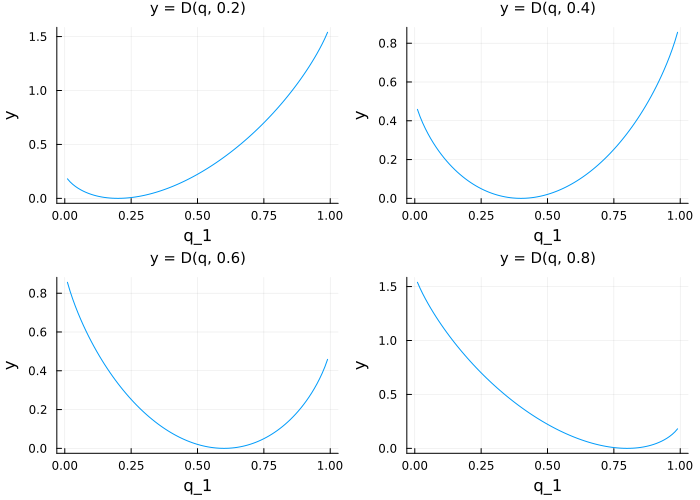

In [3]:
D(q,p) = q*log(q/p) + (1-q)*log((1-q)/(1-p))
q = 0:0.01:1
PP = []
for p in [0.2, 0.4, 0.6, 0.8]
    P = plot(legend=false)
    plot!(title="y = D(q, $(round(p,digits=3)))", titlefontsize=10)
    plot!(xlabel="q_1", ylabel="y")
    plot!(q, D.(q, p))
    push!(PP, P)
end
plot(PP..., size=(700, 500))

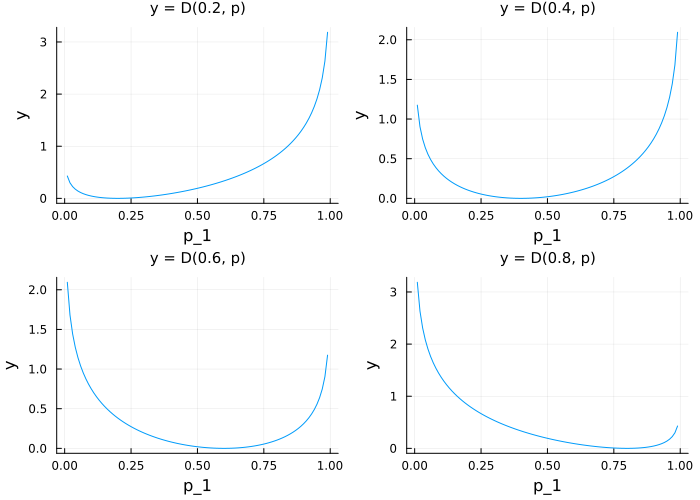

In [4]:
D(q,p) = q*log(q/p) + (1-q)*log((1-q)/(1-p))
p = 0:0.01:1
PP = []
for q in [0.2, 0.4, 0.6, 0.8]
    P = plot(legend=false)
    plot!(title="y = D($(round(q,digits=3)), p)", titlefontsize=10)
    plot!(xlabel="p_1", ylabel="y")
    plot!(p, D.(q, p))
    push!(PP, P)
end
plot(PP..., size=(700, 500))

**問題(Laplaceの方法の弱形の一種):** 実数 $E_1,\ldots,E_N$ について, $n\to\infty$ のとき, 

$$
-\frac{1}{n}\log\sum_{i=1}^N e^{-nE_i} \to \min\{E_1,\cdots,E_N\}
\tag{$*$}
$$

となることを示せ. 

**解答例:** $E_1=\cdots=E_k<E_{k+1}\leqq\cdots\leqq E_N$ と仮定してよい. このとき,

$$
-\frac{1}{n}\log\sum_{i=1}^N e^{-nE_i} =
-\frac{1}{n}\log\left(e^{-nE_1}\left(k+\sum_{i=k+1}^n e^{-n(E_i-E_1)}\right)\right) =
E_1 - \frac{1}{n}\log\left(k+\sum_{i=k+1}^n e^{-n(E_i-E_1)}\right).
$$

これより, ($*$)が成立することがわかる. $\QED$

**注意:** 上の問題の結果の $\max$ 版

$$
\frac{1}{n}\log\sum_{i=1}^N e^{nE_i} \to \max\{E_1,\cdots,E_N\}
$$

は<a href="https://www.google.co.jp/search?q=%E3%83%88%E3%83%AD%E3%83%94%E3%82%AB%E3%83%AB%E5%B9%BE%E4%BD%95">トロピカル幾何</a>における <a href="https://www.google.co.jp/search?q=max-plus%E4%BB%A3%E6%95%B0">max-plus 代数</a>の max が極限で出て来る仕組みとしても現われる. $\QED$

**注意:** コンピューターによる統計がらみの数値計算では<a href="https://www.google.co.jp/search?q=logsumexp">logsumexp</a>という函数を適切に定義して使うことがある. $\QED$

確率 $p$ で当たるくじを引く独立試行を $n$ 回繰り返したとき, 当たりが $k$ 回出る確率は

$$
\binom{n}{k}p^k(1-p)^{n-k} = \frac{n!}{k!(n-k)!}p^k(1-p)^{n-k}
$$

になる. $0\leqq a<b\leqq 1$ であるとする. このとき当たりが出た回数の割合 $k/n$ が $a$ 以上 $b$ 以下になる確率は

$$
\sum_{a\leqq k/n\leqq b}\binom{n}{k}p^k(1-p)^{n-k}
$$

になる. この確率の対数の $-1/n$ 倍

$$
-\frac{1}{n}\log \sum_{a\leqq k\leqq b}\binom{n}{k}p^k(1-p)^{n-k}
$$

が $n\to\infty$ でどうなるかについて考えよう.

Sanovの定理より, $k/n\sim q$ のとき,

$$
\binom{n}{k}p^k(1-p)^{n-k} = \exp(-nD(q|p) + o(n)).
$$

したがって, 上の問題の結果の一般化によって, $n\to\infty$ で

$$
-\frac{1}{n}\log \sum_{a\leqq k\leqq b}\binom{n}{k}p^k(1-p)^{n-k} \to
\max_{a\leqq q\leqq b} D(q||p) =
\begin{cases}
0 & (a\leqq p\leqq b) \\
D(b||p) & (b < p) \\
D(a||p) & (p < a) \\
\end{cases}
$$

となると考えられる. 要するに $a$ 以上 $b$ 以下の $k/n$ で $p$ に最も近いものが生じる確率の寄与だけが, 効いて来るということである.  (前節の説明も再読せよ.)

以上の議論は少々厳密さに欠けた荒い議論だが, 結論は正しい. 正確な議論の仕方については

* 黒木玄, <a href="https://genkuroki.github.io/documents/20160616KullbackLeibler.pdf">Kullback-Leibler情報量とSanovの定理</a>

の第3節を参照せよ.

### Sanovの定理の使い方2

KL情報量 $D(q||p)$ は, Sanovの定理によって, 確率分布 $p$ の試行を独立に $n$ 回繰り返したとき, 経験分布として $q$ に近い分布が出て来る確率が $\exp(-nD(q||p)+o(n))$ になるという性質を持っているのであった.

これより, 確率分布 $p$ の独立試行によって確率分布 $q$ をシミュレートしたときの, 予測誤差の大きさが $D(q||p)$ で測られることを意味していると考えることができる.  

$q=p$ と $D(q||p)=0$ が同値であることも, この解釈をサポートしている. 

さらに, 最も簡単(で極端)な次の場合について考えてみよう. 毎日雨が確実に降る地域で, 毎日確率 $p$ で「明日は雨が降ります」と予報を出し, 確率 $1-p$ で「明日は雨が降りません」と予報を出すことを $n$ 回繰りかすとき, 予報の出し方が間違っていたことがばれずにすむ確率は $p^n = \exp(-n(-\log p))$ になる. そして, この場合のKL情報量は

$$
D(1||p) = 1\log\frac{1}{p} + (1-1)\log\frac{1-1}{1-p} = -\log p
$$

となる(二項分布の場合の記号法をそのまま使った).  予報の出し方が間違っていたことがばれずにすむ確率が下がる速さは $D(1||p)=-\log p$ で決まっている. ゆえに, KL情報量 $D(1||p)$ は予報の出し方が間違っていたことが確率的にばれる速さを表していると考えられる. この極端で単純な場合も, KL情報量 $D(q||p)$ を確率分布 $p$ による確率分布 $q$ のシミュレーションの予測誤差を表しているという解釈をサポートしている.

より一般の場合には, Sanovの定理は

* (確率分布 $p$ の独立試行の経験分布が $q$ に近い確率) $= \exp(-nD(q||p)+o(n))$

と要約でき, 確率分布 $p$ の独立試行の経験分布が $q$ に近いことは, 確率分布 $p$ の独立試行により確率分布 $q$ の予測が間違っていることがばれずに済んでいることを意味していると解釈できるので, やはり $D(q||p)$ は予測が間違っていたことがばれるまでの速さになっていると解釈できる.

KL情報量は以上の意味で予測誤差になっていると考えられる:

* $D(q||p) =$ (確率分布 $p$ の独立試行による確率分布 $q$ のシミュレーションの予測誤差).

### 連続的な確率分布の場合

連続的な確率分布の場合であっても, 確率密度函数 $q(x)$, $p(x)$ に対するKL情報量が

$$
D(q||p) = \int q(x)\log\frac{q(x)}{p(x)}\,dx
$$

と定義され($\int$ は定積分を意味する), 適当な条件と適切な定式化のもとでSanovの定理が成立していることが知られている:

*  $D(q||p) =$ (確率分布 $p$ の独立試行による確率分布 $q$ のシミュレーションの予測誤差).

正確な内容については「<a href="https://www.google.co.jp/search?q=%E5%A4%A7%E5%81%8F%E5%B7%AE%E5%8E%9F%E7%90%86+Sanov%E3%81%AE%E5%AE%9A%E7%90%86">大偏差原理 Sanovの定理</a>」について検索して欲しい.  (連続的な $x$ 軸を $r$ 個に区切れば, $x$ 軸上の確率分布は有限集合 $\Omega=\{1,\ldots,r\}$ 上の確率分布で近似できることに注意せよ.)

確率分布 $p$ による独立試行で確率分布 $q$ をシミュレートする状況を考えよう. $\int_{-\infty}^\infty$ を単に $\int$ と書くことにすると, その場合の予測誤差は

$$
D(q|p) = \int q(x)\log\frac{q(x)}{p(x)}\,dx = G(q||p) - S(q).
$$

ここで

$$
G(q||p) = -\int q(x)\log p(x)\,dx, \quad
S(q)=-\int q(x)\log q(x)\,dx
$$

といおいた. $S(q)$ は**Shannon情報量**と呼ばれ, $G(q||p)$ は**汎化誤差**と呼ばれる.

### 正規分布による近似

例として, 正規分布

$$
p(x) = p_N(x|\mu,\sigma) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{-(x-\mu)^2/(2\sigma^2)}
$$

による独立試行で確率分布 $q(x)$ をシミュレートする場合について考えよう. 予測誤差を小さくするためには, パラメーター $\mu,\sigma$ を調節して汎化誤差 $G(q||p)$ を小さくすればよい.  $p$ が正規分布の場合には

$$
\begin{aligned}
G(q||p) &= 
\int q(x)\left(\frac{(x-\mu)^2}{2\sigma^2} + \frac{1}{2}\log\sigma^2 + \log\sqrt{2\pi}\right)\,dx
\\ &=
\frac{1}{\sigma^2}\int q(x)(x-\mu)^2\,dx + \frac{1}{2}\log\sigma^2 + \log\sqrt{2\pi}.
\end{aligned}
$$

$q(x)$ の平均と分散を

$$
\mu_q = \int q(x)x\,dx, \quad
\sigma_q^2 = \int q(x)(x-\mu_q)^2\,dx
$$

と書くと, 

$$
\int q(x)(x-\mu)^2\,dx =\int q(x)((x-\mu_q)-(\mu-\mu_q))^2\,dx =
\sigma_q^2 + (\mu-\mu_q)^2
$$

なので

$$
G(q||p) =
\frac{(\mu-\mu_q)^2}{2\sigma^2} + \frac{\sigma_q^2}{2\sigma^2} + \frac{1}{2}\log\sigma^2 + \log\sqrt{2\pi}.
$$

これより, $G(q||p)$ を最小にする $\mu,\sigma$ は $\mu=\mu_q$, $\sigma=\sigma_q$ となることがわかる. 

すなわち, 正規分布による確率分布 $q(x)$ のシミュレーションの予測誤差を最小にするためには, 正規分布の平均と分散を確率分布 $q(x)$ の平均と分散に一致させればよいことがわかった.

この結果は未知の確率分布 $q(x)$ のサンプルに基いてその平均と分散の両方を推定することは, 未知の確率分布 $q(x)$ を最も小さな予測誤差でシミュレートできる正規分布を推定することと同じことであることがわかる.

平均と分散に関する統計学は, KL情報量のSanovの定理の立場から見ると, 本質的に正規分布の統計学であるということがわかった.

以上のように, **KL情報量のSanovの定理は, 「パラメーターの推定」という考え方をより普遍的な「確率分布の推定」という考え方に高めるため役に立つ**.

**問題:** 上の計算で省略した部分を埋めよ.

**解答例:** $\sigma$ を固定したときの $G(q||p)$ の最小値は $\mu=\mu_q$ で与えられることは明らか. 

$$
f(s) = \frac{a}{s} + \log s
$$

とおくと, 

$$
f'(s) = -\frac{a}{s^2}+\frac{1}{s} = \frac{s-a}{s^2}
$$

なので $f(s)$ は $s=a$ で最小になることがわかる. これより, $G(q||p)$ は $\mu=\mu_q$, $\sigma=\sigma_q$ のときに最小になることがわかる. $\QED$

**問題:** 次の確率密度函数で定義される分布をロジスティック分布と呼ぶ:

$$
q(x) = \frac{1}{4s} \sech^2\left(\frac{x-\mu}{2s}\right).
$$

ここで

$$
\sech x = \frac{1}{\cosh x}, \quad \cosh x = \frac{e^x+e^{-x}}{2}.
$$

ロジスティック分布の平均と分散はそれぞれ

$$
\mu_q = \mu, \quad \sigma_q^2 = \frac{\pi^2 s^2}{3}.
$$

ロジスティック分布を最もよくシミュレートする正規分布の確率密度函数ともとのロジスティック分布の確率密度函数を同時にプロットしてみよ. $\QED$

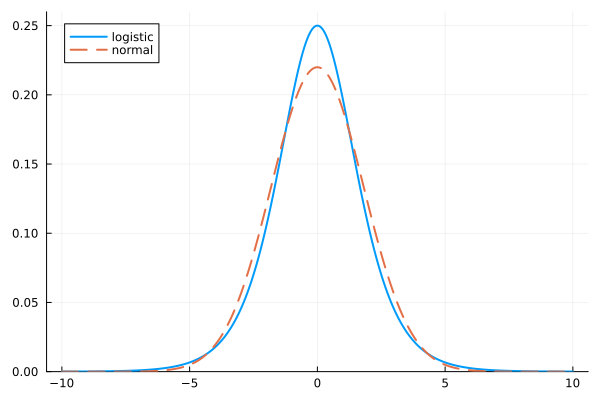

In [5]:
pdflogistic(μ,s,x) = 1/(4s)*sech((x-μ)/(2s))^2
pdfnormal(μ,σ,x) = exp(-(x-μ)^2/(2*σ^2))/√(2π*σ^2)

μ = 0.0
s = 1.0
σ = π*s/√3
x = -10:0.02:10

P = plot(legend=:topleft, ylims=(0, 0.26))
plot!(x, pdflogistic.(μ,s,x), label="logistic", lw=2)
plot!(x, pdfnormal.(μ,σ,x),   label="normal",   lw=2, ls=:dash)

ロジスティック分布の正規分布による近似に関しては

* 黒木玄, <a href="http://nbviewer.jupyter.org/gist/genkuroki/96b0508a5773035e3a5247beff1d4f99">ロジスティック分布の2通りの正規分布近似の比較</a>

も参照せよ.

### 多項分布の中心極限定理

Sanovの定理の証明によって, $k_i/n\sim q_i$ ($n\to\infty$) のとき, $n\to\infty$ で,
$$
\frac{n!}{k_1!k_2!\cdots k_r!} p_1^{k_1}p_2^{k_2}\cdots p_r^{k_r}
\sim
\left(
\prod_{i=1}^r \left(\frac{k_i/n}{p_i}\right)^{k_i}
\sqrt{(2\pi n)^{r-1}\prod_{i=1}^r\frac{k_i}{n}}
\right)^{-1}.
$$

これを

$$
\frac{k_i}{n} = p_i + \frac{x_i}{\sqrt{n}} + \eps_i, \quad
\eps_i=o\left(\frac{1}{\sqrt{n}}\right)
$$

の場合に適用すると,

$$
\begin{aligned}
&
\sum_{i=1}^r\left(\frac{x_i}{\sqrt{n}}+\eps_i\right) = 
\sum_{i=1}^r \frac{k_i}{n} - \sum_{i=1}^r p_i = 0,
\\ &
\log\left(\frac{k_i/n}{p_i}\right)^{k_r} =
np_i\left(1+\frac{x_i}{\sqrt{n}\;p_i}+\frac{\eps_i}{p_i}\right)
\log\left(1+\frac{x_i}{\sqrt{n}\;p_i}+\frac{\eps_i}{p_i}\right) =
n\left(\frac{x_i}{\sqrt{n}} + \eps_i\right) + \frac{1}{2}\frac{x_i^2}{p_i} + o(1),
\\ & \therefore\quad
\log\prod_{i=1}^r \left(\frac{k_i/n}{p_i}\right)^{k_i} =
\sum_{i=1}^r \log\left(\frac{k_i/n}{p_i}\right)^{k_i} = \frac{1}{2}\sum_{i=1}^r \frac{x_i^2}{p_i} + o(1),
\\ &
\prod_{i=1}^r \frac{k_i}{n} = p_1\cdots p_r(1+o(1))
\end{aligned}
$$

なので

$$
\frac{n!}{k_1!k_2!\cdots k_r!} p_1^{k_1}p_2^{k_2}\cdots p_r^{k_r}
\sim
\frac{\ds\exp\left(-\frac{1}{2}\sum_{i=1}^r\frac{x_i^2}{p_i}\right)}
{\sqrt{(2\pi n)^{r-1}p_1\cdots p_r}}.
$$

両辺に $dk_1\cdots k_{r-1} = \sqrt{n}\;dx_1\cdots\sqrt{n}\;dx_{r-1}$ をかけると,

$$
\frac{n!}{k_1!k_2!\cdots k_r!} p_1^{k_1}p_2^{k_2}\cdots p_r^{k_r}\,dk_1\cdots dk_{r-1}
\sim
\frac{\ds\exp\left(-\frac{1}{2}\sum_{i=1}^r\frac{x_i^2}{p_i}\right)}
{\sqrt{(2\pi)^{r-1}p_1\cdots p_r}}
\,dx_1\cdots dx_{r-1}.
$$

$k_1+\cdots+k_r=n$ より $x_1+\cdots+x_r=o(1)$ であることに注意せよ. 右辺は $(x_1,\ldots,x_{r-1})$ の多変量正規分布の確率密度函数の形になっている.

以上の結果は多項分布が $n$ が大きなときに多変量正規分布で近似できることを意味している. この結果を**多項分布の中心極限定理**と呼ぶ.

**二項分布の中心極限定理:** $r=2$ のとき, $0\leqq p\leqq 1$, $k/n = p + x/\sqrt{n} + o(1/\sqrt{n})$ のとき,

$$
\binom{n}{k}p^k(1-p)^{n-k}\,dk \sim
\frac{\ds\exp\left(-\frac{1}{2}\left(\frac{x^2}{p}+\frac{(-x)^2}{1-p}\right)\right)}
{\sqrt{2\pi p(1-p)}}\,dx =
\frac{\ds\exp\left(-\frac{x^2}{2p(1-p)}\right)}
{\sqrt{2\pi p(1-p)}}\,dx.
$$

この結果を**二項分布の中心極限定理**と呼ぶ. $\QED$

より一般の場合の中心極限定理の証明については

* 黒木玄, <a href="https://genkuroki.github.io/documents/IntroProbability.pdf">確率論入門</a>

の第2.4節を参照せよ. 本質的にTaylorの定理のみを使って中心極限定理は証明される. (積率母函数や特性函数の理論(本質的にFourier-Laplace解析の理論)を使わなくても証明できる.)

**問題:** 二項分布の中心極限定理を実際にグラフをプロットすることによって確認せよ. $\QED$

次のセルを見よ.

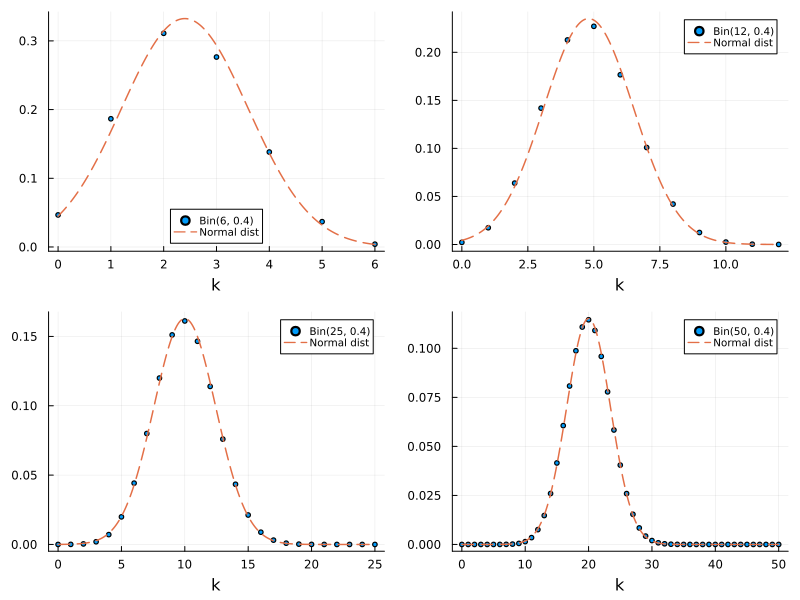

In [6]:
binomcoeff(n,k) = exp(lgamma(n+1)-lgamma(k+1)-lgamma(n-k+1))
pdfbinom(n,p,k) = 0 ≤ k ≤ n ? binomcoeff(n,k)*p^k*(1-p)^(n-k) : 0.0
pdfnormal(n,p,x) = exp(-x^2/(2p*(1-p)))/√(2π*n*p*(1-p))

PP = []
for (n,p,l) in [(6, 0.4, :bottom), (12, 0.4, :topright), (25, 0.4, :topright), (50, 0.4, :topright)]
    k = 0:n
    kk = 0:n/400:n
    x = (kk .- n*p)./√n
    P = plot(legend=l, legendfontsize=7, xlabel="k")
    scatter!(k, pdfbinom.(n,p,k),  label="Bin($n, $p)", markersize=2.5)
    plot!(kk, pdfnormal.(n,p,x), label="Normal dist", lw=1.5, ls=:dash)
    push!(PP, P)
end
plot(PP..., size=(800, 600))